# Intro to quandl and iexfinance

Steps:

1. Install [quandl](https://docs.quandl.com/docs/python-installation).
2. Create a quandl account. 
3. Get a quandl API Key.
4. Take a look at the [quandl data organization](https://docs.quandl.com/docs/data-organization) to find a free dataset. 
5. Figure out how to retrieve 2017 AAPL closing stock prices, and view using `tail`.


In [46]:
import numpy as np
import quandl

quandl.ApiConfig.api_key = 'FA6wt7Na6c5FdbqM96i4'
aapl_dataframe = quandl.get("WIKI/AAPL", start_date = '2017-01-01', end_date = '2017-12-31')
print(type(aapl_dataframe))
aapl_dataframe.tail()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0
2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0
2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0
2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0
2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0


But wait a minute: [WIKI data source is no longer supported by the community](https://www.quandl.com/databases/WIKIP). A little searching suggests IEXFinance, which has an API, and there is a [python library](https://pypi.org/project/iexfinance/).

In [62]:
import iexfinance as iex
from datetime import datetime

start = datetime(2017, 1, 1)
end = datetime(2017, 12, 31)

aapl_dataframe = iex.get_historical_data("AAPL", start=start, end=end, output_format='pandas')
aapl_dataframe.tail()

,open,high,low,close,volume
date,,,,,
2017-12-22,172.6967,173.4323,172.5188,173.0230,16349444
2017-12-26,168.8608,169.5232,167.7525,168.6334,33185536
2017-12-27,168.1687,168.8410,167.7831,168.6630,21498213
2017-12-28,169.0585,169.8988,168.5444,169.1376,16480187
2017-12-29,168.5839,168.6531,167.2987,167.3086,25999922


Do something interesting with the data. Do the returns look normally distributed?

1. Extract the adjusted close prices. 
2. Use numpy's `log` and pandas `shift` functions to compute returns. 
3. Use matplotlib.pyplot and scipy.stats to create a histogram and probability plot for AAPL stock returns.

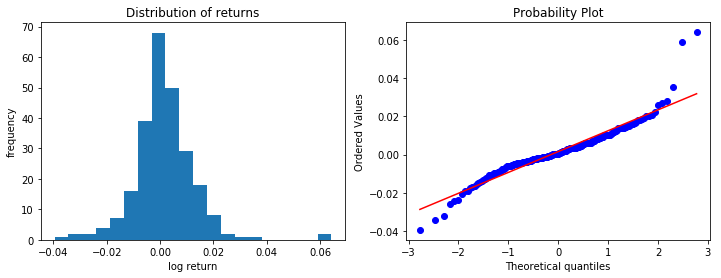

In [63]:
import matplotlib.pyplot as plt
import scipy.stats as stats

aapl_close_series = aapl_dataframe['close']

def returns(time_series):
    return np.log(time_series / time_series.shift(1))[1:]

r = returns(aapl_close_series)

def plot_hist_pp(returns_time_series):
    fig, (histo, qq) = plt.subplots(1, 2, figsize=(12, 4))
    histo.hist(returns_time_series, bins = 20)
    histo.set_title('Distribution of returns')
    histo.set_xlabel('log return')
    histo.set_ylabel('frequency')
    stats.probplot(returns_time_series, dist='norm', plot=plt)
    plt.show()
    
plot_hist_pp(r)

Now let's look at US Treasury data for 2017. 

1. From quandl, figure out which dataset to use. 

In [24]:
ust_df = quandl.get('USTREASURY/BILLRATES', start_date='2017-01-01', end_date='2017-12-31')
ust_df.tail()

,4 Wk Bank Discount Rate,4 Wk Coupon Equiv,8 Wk Bank Discount Rate,8 Wk Coupon Equiv,13 Wk Bank Discount Rate,13 Wk Coupon Equiv,26 Wk Bank Discount Rate,26 Wk Coupon Equiv,52 Wk Bank Discount Rate,52 Wk Coupon Equiv
Date,,,,,,,,,,
2017-12-22,1.12,1.14,None,None,1.31,1.33,1.51,1.54,1.68,1.72
2017-12-26,1.22,1.24,None,None,1.45,1.48,1.49,1.52,1.69,1.73
2017-12-27,1.15,1.17,None,None,1.42,1.44,1.50,1.53,1.69,1.73
2017-12-28,1.16,1.18,None,None,1.37,1.39,1.51,1.54,1.70,1.74
2017-12-29,1.25,1.27,None,None,1.37,1.39,1.50,1.53,1.70,1.74


Now, let's graph it as before. What happens? How can we fix it?

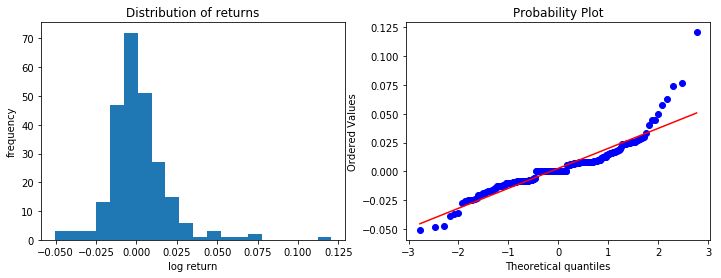

In [51]:
one_year_ust_series = ust_df['52 Wk Coupon Equiv']
# for index, row in ust_df.iterrows():
#     if row['52 Wk Coupon Equiv'] == 0:
#         print(index, row)
one_year_ust_series = one_year_ust_series[one_year_ust_series > 0]
        
plot_hist_pp(returns(one_year_ust_series))

Finally, let's look at the EUR/USD exchange rate.

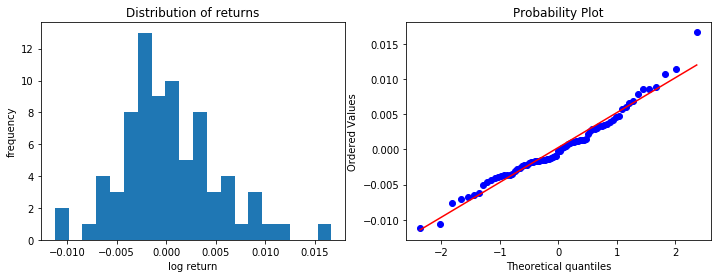

In [57]:
eur_usd_df = quandl.get("CME/EUSM2018", start_date = '2017-01-01', end_date = '2017-12-31')
eur_usd_df.tail()   
plot_hist_pp(returns(eur_usd_df['Settle']))